# Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt

## Load the data from CSV file

In [2]:
cust = pd.read_csv('data/telco_customer_churn.csv')

In [3]:
display(HTML(cust.head().to_html()))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the Column Types

In [4]:
cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Convert String labels to Numeric

In [5]:
cust['Churn'] = np.where(cust['Churn']=='Yes',1,0)

### Select features to train the model

In [6]:
cust = cust[['gender','MonthlyCharges','tenure','Churn']]

### Split the data set into Train and Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cust.drop(columns = ['Churn'], axis=1), cust['Churn'], test_size=0.2, random_state=2018, shuffle=True)

### Encode the categorical variables

In [8]:
print(X_train.shape)
print(X_test.shape)

(5634, 3)
(1409, 3)


In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


In [11]:
display(HTML(X_train.head().to_html()))

,MonthlyCharges,tenure,gender_Female,gender_Male
3569,19.95,17,0,1
5900,40.20,37,0,1
1056,80.00,5,1,0
4417,70.45,1,0,1
4756,72.45,31,0,1


### Train Decision Tree Classifier

In [12]:
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, y_train)

In [13]:
dec_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict on the Test dataset using the Trained model

In [14]:
pred_test = dec_tree.predict(X_test) # Predict the labels
pred_test_prob = dec_tree.predict_proba(X_test) # Predict the probabilities

### Evaluate the model performance

In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

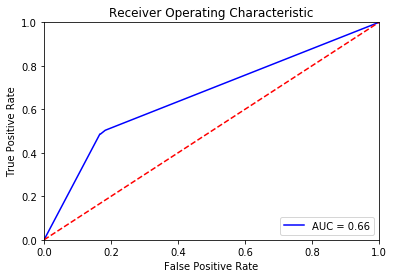

In [16]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Area Under the Curve (AUC)

In [17]:
metrics.roc_auc_score(y_test, pred_test_prob[:,1])

0.6629725806372514

#### Overall Accuracy

In [18]:
metrics.accuracy_score(y_test, pred_test)

0.73172462739531585